In [1]:
import pandas as pd
df = pd.read_csv('data/census.csv')

df = df.drop(0)
df = df.rename(columns={
    'tract20_nbhd': 'Neighborhood',
    'P0020001': 'Pop Total',
    'P0020005': 'Pop White',
    'P0020006': 'Pop Black',
    'P0020002': 'Pop Latino',
    'P002aapi': 'Pop AAPI',
    'P002others': 'Pop Other',
    'P0040001': 'Adults',
    'P0040005': 'Adults White',
    'P0040006': 'Adults Black',
    'P0040002': 'Adults Latino',
    'P004aapi': 'Adults AAPI',
    'P004others': 'Adults Other',
    'P00x0001': 'Children',
    'P00x0005': 'Children White',
    'P00x0006': 'Children Black',
    'P00x0002': 'Children Latino',
    'P00xaapi': 'Children AAPI',
    'P00xothers': 'Children Other',
    'hhpop': 'Household Population',
    'P0050001': 'Unknown',
    'P0050002': 'Institutionalized',
    'P0050007': 'Noninstitutionalized',
    'hhsize': 'Household Size'
})
df['Neighborhood'] = df['Neighborhood'].str.strip()
df = df.set_index('Neighborhood')
df = df.apply(pd.to_numeric)

In [2]:
df.head()

,Pop Total,Pop White,Pop Black,Pop Latino,Pop AAPI,Pop Other,Adults,Adults White,Adults Black,Adults Latino,...,P0050005,P0050006,Noninstitutionalized,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,Household Size
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,2726,...,0,0,3281,3214,0,67,10748,10027,721,2.156478
Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,1091,...,269,0,1610,1487,0,123,11524,10006,1518,1.630122
Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,475,...,0,0,33,0,0,33,6037,5485,552,1.696080
Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,4388,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292
Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,1387,...,55,0,55,0,30,25,9525,8932,593,2.128303


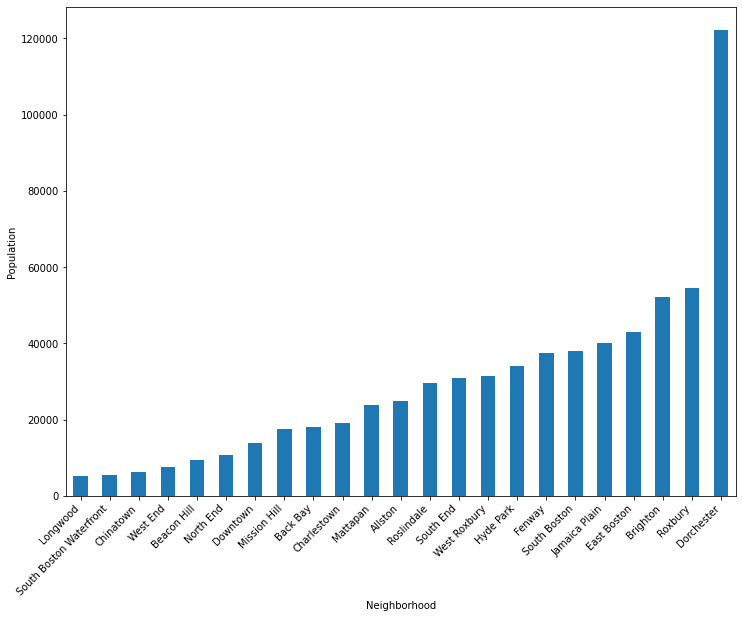

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
df['Pop Total'].sort_values().plot.bar()
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right');

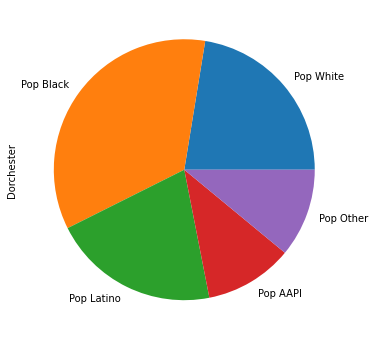

In [4]:
plt.figure(figsize=(6, 6))
dot = df.loc['Dorchester'][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
dot.plot.pie();

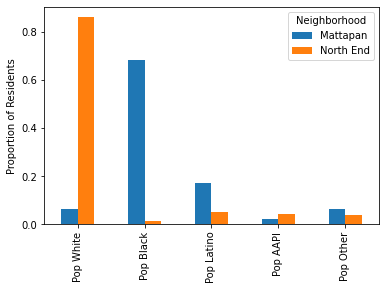

In [5]:
mvne = df.loc[['Mattapan', 'North End']][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
mvne = mvne.T / df.loc[['Mattapan', 'North End']]['Pop Total']

mvne.plot.bar()
plt.ylabel('Proportion of Residents');

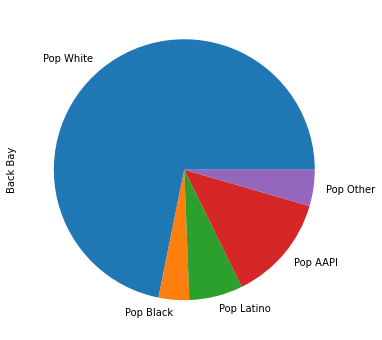

In [6]:
plt.figure(figsize=(6, 6))
bb = df.loc['Back Bay'][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
bb.plot.pie();

In [7]:
proj = pd.read_csv('data/projects_by_location.csv')
proj.index = proj['Neighborhood']
proj = proj.drop('Neighborhood', axis=1)

# edits to the neighborhood classifications, as determined by census methodology
# https://data.boston.gov/dataset/neighborhood-demographics/resource/f2112b0b-a650-4c6b-a723-cfdaf5f817a6
proj.loc['South End'] += proj.loc['Bay Village']
proj = proj.drop('Bay Village')
proj = proj.rename(index={
    'Downtown/Government Center': 'Downtown',
    'Fenway-Kenmore': 'Fenway'
})

# recalc percentages
proj['Budget_Percentage'] = proj['Total_Project_Budget'] * 100 / proj['Total_Project_Budget'].sum()

proj

,Total_Project_Budget,Percentage,Budget_Percentage
Neighborhood,,,
Charlestown,531212390.0,18.848537,18.848537
Downtown,318415000.0,11.298036,11.298036
Chinatown,271272172.0,9.625309,9.625309
Dorchester,239411239.0,8.494816,8.494816
Roxbury,237308325.0,8.420200,8.420200
South Boston,200249965.0,7.105291,7.105291
South End,182957034.0,6.491702,6.491702
Harbor Islands,171778144.0,6.095051,6.095051
Roslindale,102470000.0,3.635852,3.635852


In [8]:
proj.index[~proj.index.isin(df.index)]

Index(['Harbor Islands', 'Allston/Brighton'], dtype='object', name='Neighborhood')

In [9]:
df.index[~df.index.isin(proj.index)]

Index(['Allston', 'Brighton', 'Longwood', 'South Boston Waterfront'], dtype='object', name='Neighborhood')

In [10]:
df.loc['Allston/Brighton'] = df.loc['Allston'] + df.loc['Brighton']
df.loc['Allston/Brighton']['Household Size'] /= 2
df.loc['Allston/Brighton']['Household Population'] /= 2

In [11]:
df2 = pd.merge(df, proj, how='inner', left_index=True, right_index=True)
df2.head()

,Pop Total,Pop White,Pop Black,Pop Latino,Pop AAPI,Pop Other,Adults,Adults White,Adults Black,Adults Latino,...,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,Household Size,Total_Project_Budget,Percentage,Budget_Percentage
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Back Bay,18190.0,13065.0,690.0,1208.0,2410.0,817.0,17042.0,12349.0,641.0,1091.0,...,1487.0,0.0,123.0,11524.0,10006.0,1518.0,1.630122,65442299.0,2.322031,2.322031
Beacon Hill,9336.0,7521.0,252.0,537.0,630.0,396.0,8603.0,6980.0,231.0,475.0,...,0.0,0.0,33.0,6037.0,5485.0,552.0,1.696080,34410000.0,1.220939,1.220939
Charlestown,19120.0,13626.0,990.0,2075.0,1650.0,779.0,15661.0,11689.0,662.0,1387.0,...,0.0,30.0,25.0,9525.0,8932.0,593.0,2.128303,531212390.0,18.848537,18.848537
Chinatown,6211.0,1844.0,254.0,451.0,3480.0,182.0,5477.0,1741.0,216.0,390.0,...,443.0,0.0,3.0,3272.0,2937.0,335.0,1.962887,271272172.0,9.625309,9.625309
Dorchester,122191.0,27411.0,42714.0,25285.0,13360.0,13421.0,95365.0,24327.0,32678.0,17390.0,...,0.0,0.0,936.0,47965.0,44823.0,3142.0,2.692323,239411239.0,8.494816,8.494816


In [12]:
df2['Budget_PC'] = df2['Total_Project_Budget'] / df2['Pop Total']
df2['Budget_PC'].sort_values(ascending=False)

Neighborhood
Chinatown           43676.086299
Charlestown         27783.074791
Downtown            23127.178966
North End            8833.410458
South End            5920.173246
South Boston         5281.271329
Roxbury              4351.646251
Mattapan             3688.548658
Beacon Hill          3685.732648
Back Bay             3597.707477
Roslindale           3463.462448
Jamaica Plain        2041.734350
Dorchester           1959.319745
West Roxbury         1541.300973
East Boston          1450.283054
Allston/Brighton      748.593261
West End              648.929267
Fenway                340.063479
Mission Hill          299.247174
Hyde Park             193.579539
Name: Budget_PC, dtype: float64

In [13]:
avg_budget_pc = df2['Total_Project_Budget'].sum() / df2['Pop Total'].sum()
avg_budget_pc

3980.4710098934847

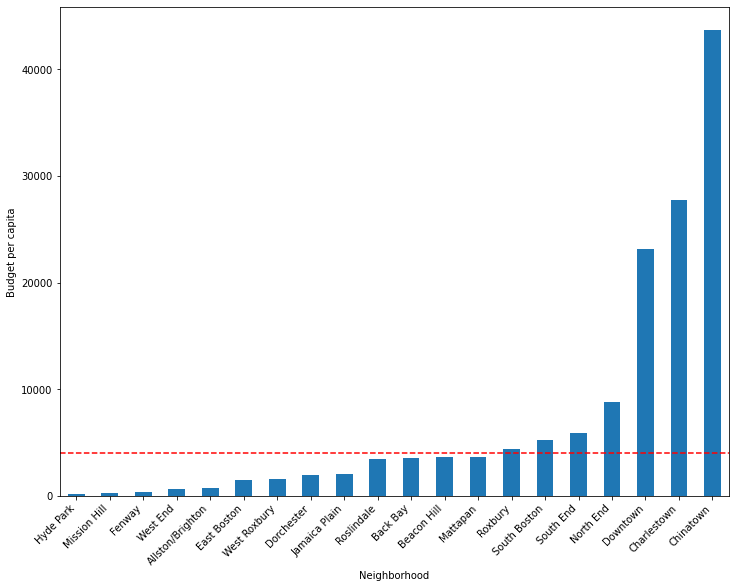

In [14]:
plt.figure(figsize=(12, 9))
df2['Budget_PC'].sort_values().plot.bar()
plt.ylabel('Budget per capita')
plt.axhline(y = avg_budget_pc, color = 'r', linestyle = '--')
plt.xticks(rotation=45, ha='right');

<Axes: xlabel='Neighborhood'>

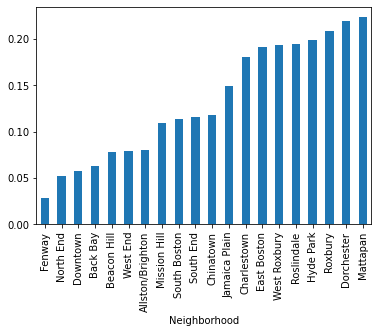

In [15]:
df2['% Children'] = df2['Children'] / df2['Pop Total']
df2['% Children'].sort_values().plot.bar()

In [16]:
df2['% White'] = df2['Pop White'] / df2['Pop Total']
df2['% Black'] = df2['Pop Black'] / df2['Pop Total']
df2['% Latino'] = df2['Pop Latino'] / df2['Pop Total']
df2['% AAPI'] = df2['Pop AAPI'] / df2['Pop Total']
df2['% Other'] = df2['Pop Other'] / df2['Pop Total']

df2[['% White', '% Black', '% Latino', '% AAPI', '% Other', '% Children', 'Budget_PC']].corr()['Budget_PC']

% White       0.041067
% Black      -0.247969
% Latino     -0.320478
% AAPI        0.627505
% Other      -0.413424
% Children   -0.091185
Budget_PC     1.000000
Name: Budget_PC, dtype: float64

/Users/tobyueno/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


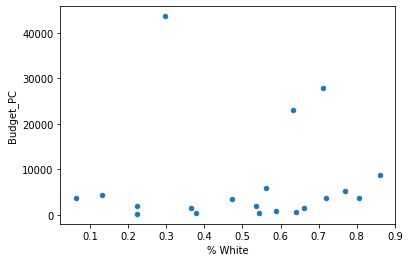

In [17]:
df2.plot.scatter('% White', 'Budget_PC');
# differently shaped than below

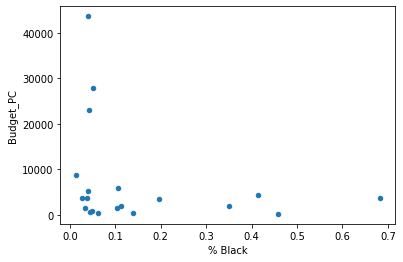

In [18]:
df2.plot.scatter('% Black', 'Budget_PC');

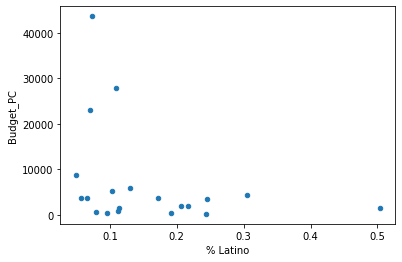

In [19]:
df2.plot.scatter('% Latino', 'Budget_PC');

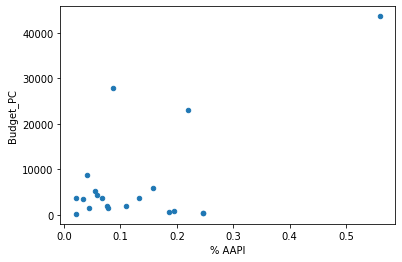

In [20]:
df2.plot.scatter('% AAPI', 'Budget_PC');
# notably different shaped graph than other minority race groups

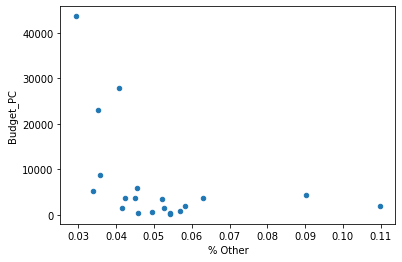

In [21]:
df2.plot.scatter('% Other', 'Budget_PC');

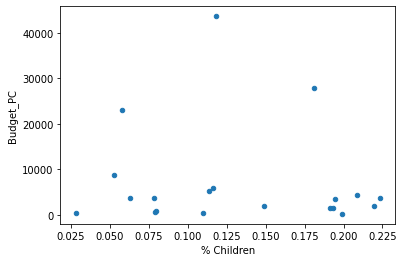

In [22]:
df2.plot.scatter('% Children', 'Budget_PC');